# Image Space in Jupyter - WorldView 3
This notebook explores the conversion of an image from geographic space to image space using the ArcGIS API for Python.

In [1]:
from arcgis import GIS
from arcgis.raster import ImageryLayer

gis = GIS()

#gis.users.me

## The image service - WV3 over San Francisco

Here, I initialize an imagery layer from a WV3 service over SanFrancisco, CA.

In [2]:
il =  ImageryLayer(url = 'https://imageserver.imagery.esri.com/arcgis/rest/services/Maxar/SanFrancisco_WV3_PS_DEM/ImageServer', 
                   gis = gis
)

## Image Service as a Catalog

In [3]:
il_qlyr = il.query()
il_qlyr.sdf

,AcquisitionDate,Category,CenterX,CenterY,CloudCover,Dataset_ID,HighPS,LowPS,MaxPS,MinPS,Name,OBJECTID,OffNadir,ProductName,SHAPE,SensorName,SunAzimuth,SunElevation
0,2015-03-29 18:55:10.918999910,1,-1.363030e+07,4.538056e+06,0,WV3_PS,8.640833,0.540052,35,0,15MAR29185510-M1BS-056144411210_01_P001;15MAR2...,1,26.9,Basic1B,"{""rings"": [[[-13629342.946899999, 4527372.2123...",WorldView-3,147.1,51.4
1,2015-03-29 18:55:11.079999924,1,-1.363867e+07,4.538085e+06,0,WV3_PS,1.109871,0.277468,35,0,15MAR29185511-M1BS-056144411210_01_P002;15MAR2...,2,27.4,Basic1B,"{""rings"": [[[-13635307.9919, 4536394.738300003...",WorldView-3,147.0,51.4
2,2016-06-21 19:13:22.418999910,1,-1.363092e+07,4.550049e+06,0,WV3_PS,7.491710,0.468232,35,0,16JUN21191322-M1BS-056144411220_01_P001;16JUN2...,3,12.8,Basic1B,"{""rings"": [[[-13622917.7487, 4541574.8728], [-...",WorldView-3,134.5,71.1
3,2016-06-21 19:13:24.127000093,1,-1.362367e+07,4.550121e+06,0,WV3_PS,0.857392,0.214348,35,0,16JUN21191324-M1BS-056144411220_01_P002;16JUN2...,4,12.3,Basic1B,"{""rings"": [[[-13620935.791299999, 4546942.3242...",WorldView-3,134.6,71.1
4,2016-10-22 19:07:44.937999964,1,-1.363068e+07,4.546916e+06,0,WV3_PS,8.851250,0.553203,35,0,16OCT22190744-M1BS-056144411230_01_P001;16OCT2...,5,27.4,Basic1B,"{""rings"": [[[-13621498.4641, 4546813.340800002...",WorldView-3,165.1,39.8
5,2016-10-22 19:07:44.944999933,1,-1.363834e+07,4.546962e+06,0,WV3_PS,0.739537,0.184884,35,0,16OCT22190744-M1BS-056144411230_01_P002;16OCT2...,6,27.7,Basic1B,"{""rings"": [[[-13635819.4602, 4546940.013700001...",WorldView-3,165.0,39.8


## Grabing an image by it's ```OBJECTID```

In [4]:
image_1 = il.catalog_item(3)
image_1

<RasterCatalogItem at https://imageserver.imagery.esri.com/arcgis/rest/services/Maxar/SanFrancisco_WV3_PS_DEM/ImageServer/3>

## Does this item have image coordinate space?

If an image has image coordinate space, we should be able to see it by calling ```image_1.ics```.  If there is no image space capablity, it will return **null**. 

In [5]:
image_1.ics

{'ics': {'name': 'AMD_SanFrancisco_WV3_PS_DEM_CAT\\Raster.OBJECTID = 3',
  'alias': '',
  'abbreviation': '',
  'remarks': '',
  'geodataXform': {'xf_0': {'name': 'Topup',
    'coefficients': [0.9672467661305852,
     0.25383792744569306,
     4154.937292424871,
     -0.25383792744569306,
     0.9672467661305852,
     2941.810313293001],
    'cellsizeRatio': 1,
    'type': 'GeometricXform'},
   'xf_1': {'spatialReference': {'wkid': 4326,
     'latestWkid': 4326,
     'vcsWkid': 115700,
     'latestVcsWkid': 115700},
    'constantZ': 87,
    'ZFactor': 1,
    'ZOffset': 0,
    'correctGeoid': False,
    'requireDEM': False,
    'RPC': [14629,
     13476,
     37.7917,
     -122.4487,
     87,
     14630,
     13478,
     0.0618,
     0.0889,
     500,
     -0.003147027,
     1.038084,
     0.02164006,
     -0.01610759,
     0.001183975,
     0.0004827732,
     -1.959077e-05,
     0.003463612,
     0.0001608472,
     -6.679271e-06,
     5.5185e-06,
     -0.0004773437,
     -0.0001099667,

In [6]:
image_1.ics['ics']['extent']

{'xmin': -122.5359766149861,
 'ymin': 37.73013743039774,
 'xmax': -122.36122330242377,
 'ymax': 37.853210790804305,
 'spatialReference': {'wkid': 4326,
  'latestWkid': 4326,
  'vcsWkid': 115700,
  'latestVcsWkid': 115700}}

# Viewing in Image Coordinate Space

Use the ```image.ics``` to project to image coordinate space.

In [10]:
display(image_1)

<RasterCatalogItem at https://imageserver.imagery.esri.com/arcgis/rest/services/Maxar/SanFrancisco_WV3_PS_DEM/ImageServer/3>

In [46]:
from IPython.display import Image

im_ics = image_1.image(return_format='image',
                  bbox = image_1.ics['ics']['extent'],
                  image_sr=image_1.ics
)

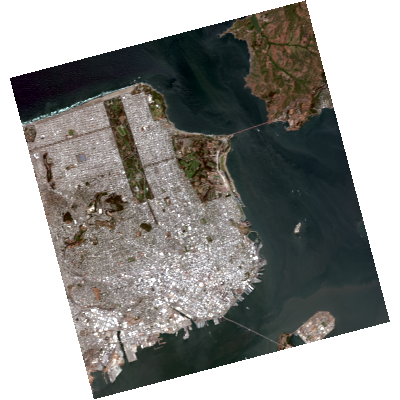

In [47]:
Image(im_ics)

In [48]:
im_ics

'C:\\Users\\greg6750\\AppData\\Local\\Temp\\14\\5e0d3a94fe8e49ba8c41c5a6ad663613.png'

# Viewing in Geographic Coordinate Space

If I don't specify an ```image_sr```, the image will come back in geographic coordinate space.

In [49]:
im_gcs = image_1.image(return_format='image',
                  bbox = image_1.ics['ics']['extent'],
)

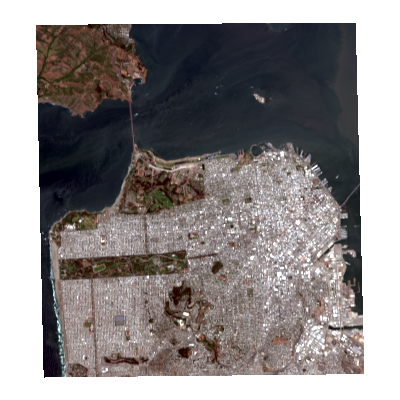

In [50]:
Image(im_gcs)

In [34]:
im_gcs

'C:\\Users\\greg6750\\AppData\\Local\\Temp\\14\\c76ac74bdfef42bfa0330c23c55ad145.png'